# Task 6.5: Unsupervised Machine Learning: Clustering

## 1. Import libraries and data

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# create file path and load data
path = r'C:\Users\Marvin\Task 6'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_data_updated.pkl'))
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [4]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'data_updated.csv'))

## 2. Dropping non numeric columns

In [4]:
# Finde the NaN values
nan_values = df.isnull().sum()

In [5]:
print(nan_values)

Country                            0
Region                           467
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Year                               0
dtype: int64


In [6]:
# Find the row where the NaN value occurs in the "Trust (Government Corruption)" column
rows_with_nan = df[df['Trust (Government Corruption)'].isnull()]

# Print the rows with NaN value in the "Trust (Government Corruption)" column
print(rows_with_nan)


                  Country Region  Happiness Rank  Happiness Score  \
489  United Arab Emirates    NaN              20            6.774   

     Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
489                     2.096   0.776                      0.67    0.284   

     Trust (Government Corruption)  Generosity  Year  
489                            NaN       0.186  2018  


In [7]:
# Filter the DataFrame to show only the "Trust (Government Corruption)" and "Country" columns
# for rows where the "Country" column is "United Arab Emirates"
uae_rows = df[df['Country'] == 'United Arab Emirates'][['Country', 'Trust (Government Corruption)','Year']]

# Print the filtered DataFrame
print(uae_rows)

                  Country  Trust (Government Corruption)  Year
19   United Arab Emirates                        0.38583  2015
185  United Arab Emirates                        0.35561  2016
335  United Arab Emirates                        0.32449  2017
489  United Arab Emirates                            NaN  2018
646  United Arab Emirates                        0.18200  2019


In [8]:
# Calculated the average value
average_trust = 0.31198

# Replace NaN values in the "Trust (Government Corruption)" column with the average value
df.loc[df['Country'] == 'United Arab Emirates', 'Trust (Government Corruption)'] = df.loc[df['Country'] == 'United Arab Emirates', 'Trust (Government Corruption)'].fillna(average_trust)

# Verify the changes
print(df[df['Country'] == 'United Arab Emirates'])

                  Country                           Region  Happiness Rank  \
19   United Arab Emirates  Middle East and Northern Africa              20   
185  United Arab Emirates  Middle East and Northern Africa              28   
335  United Arab Emirates                              NaN              21   
489  United Arab Emirates                              NaN              20   
646  United Arab Emirates                              NaN              21   

     Happiness Score  Economy (GDP per Capita)   Family  \
19             6.901                  1.427270  1.12575   
185            6.573                  1.573520  0.87114   
335            6.648                  1.626343  1.26641   
489            6.774                  2.096000  0.77600   
646            6.825                  1.503000  1.31000   

     Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
19                   0.809250  0.641570                        0.38583   
185                  0.72993

In [9]:
# drop non-numeric columns from the dataset to perform K-means algorithm

df_num=df.drop(columns=['Region','Country','Happiness Rank','Year'])

In [10]:
df_num.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


## 3. Elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

C:\Users\Marvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Marvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

[-1294.0431172225108,
 -488.9884592281966,
 -306.98413035107984,
 -237.60500770766592,
 -194.7575624557716,
 -177.30924277682095,
 -163.02019089970088,
 -152.28323275473596,
 -144.59863090727845]

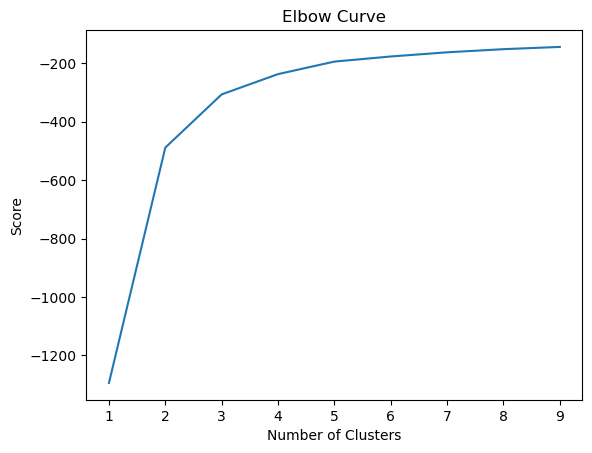

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### In this Elbow curve, there's a smooth jump from four to five on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is five.

## 4. k-means Clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

C:\Users\Marvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=5)

In [16]:
df_num['clusters'] = kmeans.fit_predict(df_num)

C:\Users\Marvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Marvin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [17]:
df_num.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,4
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,4
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,4
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,4


In [18]:
df_num['clusters'].value_counts()

clusters
2    201
0    189
3    175
4    115
1    102
Name: count, dtype: int64

## 5. Creating visualizations

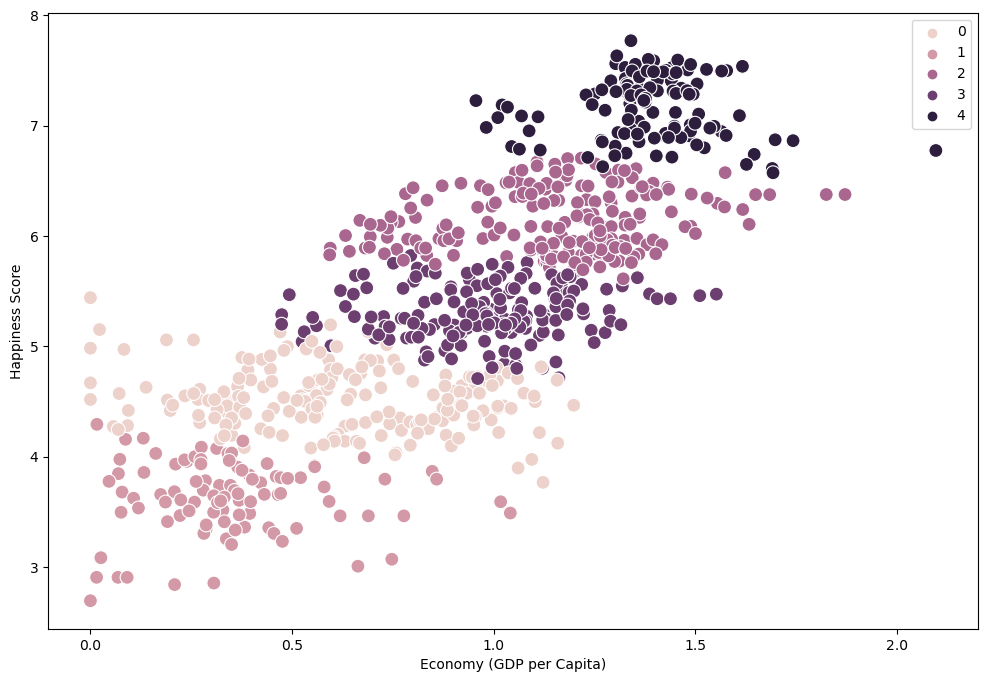

In [19]:
# Plot the clusters for the "Happiness Score" and "Economy (GDP per Capita)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Economy (GDP per Capita)'], y=df_num['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy (GDP per Capita)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

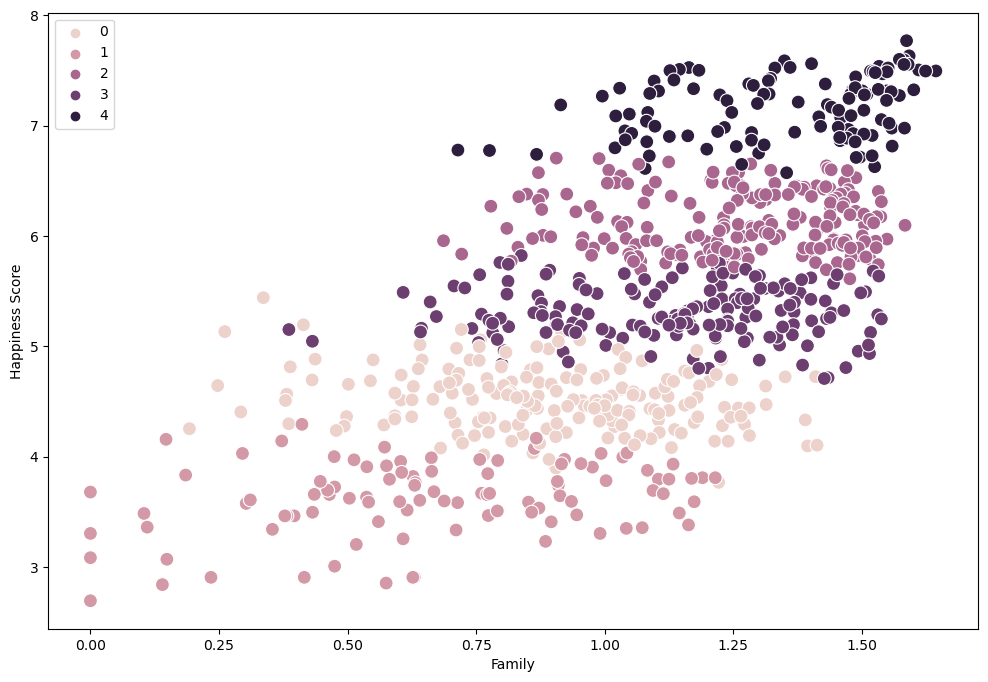

In [20]:
# Plot the clusters for the "Happiness Score" and "Economy (GDP per Capita)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Family'], y=df_num['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Family') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

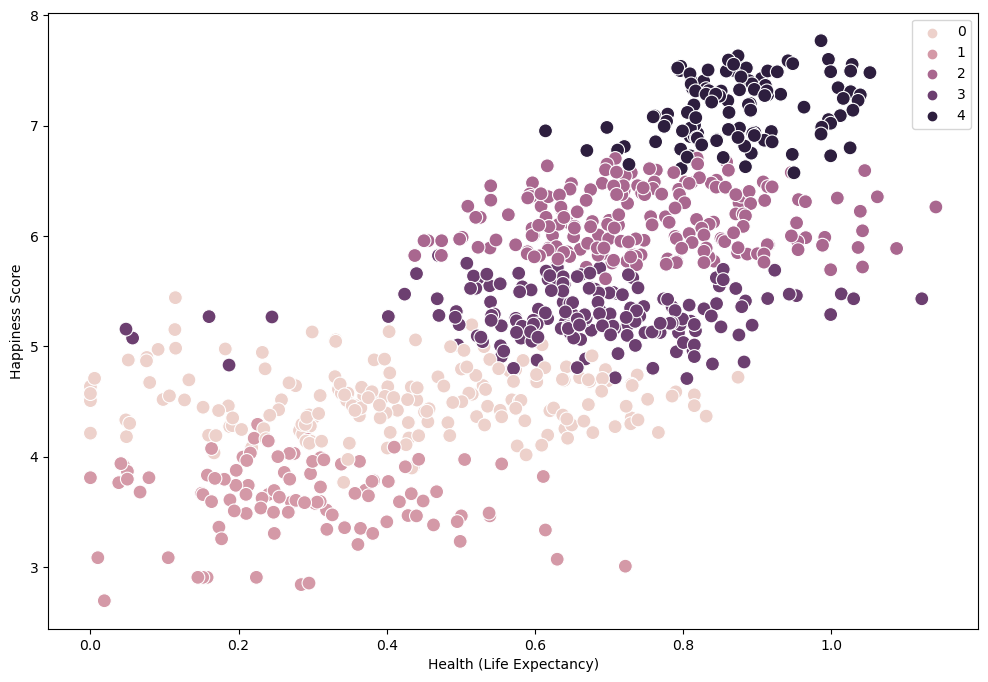

In [21]:
# Plot the clusters for the "Happiness Score" and "Economy (GDP per Capita)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Health (Life Expectancy)'], y=df_num['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Health (Life Expectancy)') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

## 6. Discussion

All three clusters make sense.

The clusters are making the most sense in the Economy (GDP per Capita) plot, because there are not spread with outliers into different clusters.

In the Health (Life Expectancy) and Family plot there are a few outliers who are in a different cluster, but they mostly make sense in score of happiness.

## 7. Grouping

In [23]:
df_num.groupby('clusters').agg({'Happiness Score':['mean', 'median'], 
                         'Family':['mean', 'median'], 
                         'Economy (GDP per Capita)':['mean', 'median'],
                               'Health (Life Expectancy)':['mean','median']
                          })

Happiness Score            Family           Economy (GDP per Capita)  \
                    mean  median      mean    median                     mean   
clusters                                                                        
0               4.520032  4.5120  0.898144  0.905280                 0.622117   
1               3.620882  3.6565  0.663174  0.636115                 0.344496   
2               6.131965  6.0960  1.256485  1.274297                 1.158158   
3               5.298143  5.2740  1.132091  1.166000                 0.978843   
4               7.157183  7.1870  1.349920  1.428939                 1.387331   

                   Health (Life Expectancy)            
            median                     mean    median  
clusters                                               
0         0.605000                 0.427613  0.428000  
1         0.325730                 0.290737  0.276131  
2         1.197000                 0.750633  0.736080  
3         0.991012                 0.670013  0.667465  
4         1.383000                 0.872222  0.867330

In [24]:
df_num.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,4
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,4
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,4
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,4


## 8. Discussion

A more comprehensive understanding of the clusters can be gained and whether they effectively capture meaningful subgroups within the Happiness data. It's possible that the current clustering might need a little bit of refinement based on the insights uncovered from a more comprehensive analysis. In case data points within a cluster significantly deviate from the cluster's mean or median, it could indicate unusual cases that require further investigation. These clusters can be of help to understand comparison between Happiness Score/Economy and Health and Family, which have the best correlation.